In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

dataset = pd.read_csv(r"C:\Users\ISHAAN\OneDrive\Desktop\AI Project\learning_traces.13m.csv\learning_traces.13m.csv")
dataset.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
count,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07
mean,8.961056e-01,1.362589e+09,7.295811e+05,2.198109e+01,1.935025e+01,1.817686e+00,1.644134e+00
std,2.714048e-01,2.932082e+05,2.246499e+06,1.295508e+02,1.119681e+02,1.360180e+00,1.318794e+00
min,0.000000e+00,1.362076e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.362343e+09,5.320000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.362591e+09,7.713400e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.362846e+09,4.425070e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00
max,1.000000e+00,1.363105e+09,4.032836e+07,1.351800e+04,1.288800e+04,2.000000e+01,2.000000e+01


Checking if the data is clean, and dropping irrelevant columns

In [37]:
print(dataset.isnull().sum())
dataset.drop(columns = ['session_seen','session_correct','timestamp','user_id'], axis = 1, inplace = True)
print(dataset.head())

p_recall             0
timestamp            0
delta                0
user_id              0
learning_language    0
ui_language          0
lexeme_id            0
lexeme_string        0
history_seen         0
history_correct      0
session_seen         0
session_correct      0
dtype: int64
   p_recall     delta learning_language ui_language  \
0       1.0  27649635                de          en   
1       0.5  27649635                de          en   
2       1.0  27649635                de          en   
3       0.5  27649635                de          en   
4       1.0  27649635                de          en   

                          lexeme_id                     lexeme_string  \
0  76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1  7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4  84920990d780

In [38]:
en_dataset = dataset.loc[dataset['ui_language'] == 'en']
spanish_learner = en_dataset.loc[dataset['learning_language'] == 'es'].copy()
spanish_learner.drop(columns = ['ui_language','learning_language'], axis = 1, inplace = True)

We have now split the dataset, firstly into the users on the English UI. For the next part, we have selected all the examples of people learning Spanish

In [39]:
#splitting data into testing and training
from sklearn.model_selection import train_test_split


X = spanish_learner.drop(columns = ['p_recall','lexeme_id','lexeme_string'])
y = spanish_learner.p_recall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [40]:
#now i will use a linear regressor to predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

lr_spanish = LinearRegression()
lr_spanish.fit(X_train,y_train)
y_pred = lr_spanish.predict(X_test)



print(mean_squared_error(y_pred,y_test))


0.07237797896536205


In [41]:
ones = np.ones(y_pred.size)
print(mean_squared_error(ones,y_test))

0.08313204317147346


We can see that the mean error of our model is barely lower than a model which predicts p_recall as 1 for any input. To figure out why, we have plotted the distribution of p_recall in our dataset

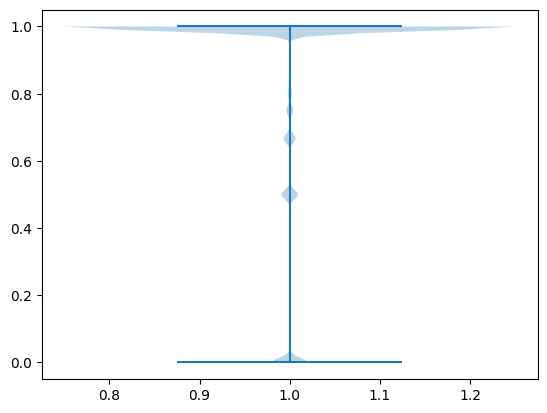

In [42]:
import matplotlib.pyplot as plt

plt.violinplot(spanish_learner['p_recall'])
plt.show()

In [43]:
#changing distribution of data and then testing a linear regressor
spanish_learner_normal = en_dataset.loc[dataset['learning_language'] == 'es'].copy()
new_p_recall = np.random.normal(loc = 0.5, scale = 0.1, size = len(spanish_learner_normal))
new_p_recall = np.clip(new_p_recall, 0, 1)
spanish_learner_normal['p_recall'] = new_p_recall

X = spanish_learner_normal.drop(columns = ['p_recall','lexeme_id','lexeme_string','ui_language','learning_language'])
y = spanish_learner_normal.p_recall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr_spanish = LinearRegression()
lr_spanish.fit(X_train,y_train)
y_pred = lr_spanish.predict(X_test)





print(mean_squared_error(y_pred,y_test))


0.010024309673820743


In [44]:
X = spanish_learner.drop(columns = ['p_recall','lexeme_id','lexeme_string'])
y = spanish_learner.p_recall

y_pred = lr_spanish.predict(X)
print(mean_squared_error(y,y_pred))

0.23127888379428796


After undersampling, the model model has a significantly lower error, this did not translate when we used the entire dataset to test.
Clearly the distribution of data is important.

Now, we will try out the same model, but with Dutch learners instead of Spanish learners

In [45]:
de_learner = en_dataset.loc[dataset['learning_language'] == 'de'].copy()
de_learner.drop(columns = ['ui_language','learning_language'], axis = 1, inplace = True)


X = de_learner.drop(columns = ['p_recall','lexeme_id','lexeme_string'])
y = de_learner.p_recall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr_de = LinearRegression()
lr_de.fit(X_train,y_train)
y_pred = lr_de.predict(X_test)





print(mean_squared_error(y_pred,y_test))

y_pred = lr_spanish.predict(X_test)
print(mean_squared_error(y_pred,y_test))


0.07748551846262178
0.23240632059715916


In [46]:
de_learner_normal = en_dataset.loc[dataset['learning_language'] == 'de'].copy()
new_p_recall = np.random.normal(loc = 0.5, scale = 0.1, size = len(de_learner_normal))
new_p_recall = np.clip(new_p_recall, 0, 1)
de_learner_normal['p_recall'] = new_p_recall

X = de_learner_normal.drop(columns = ['p_recall','lexeme_id','lexeme_string','ui_language','learning_language'])
y = de_learner_normal.p_recall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr_de = LinearRegression()
lr_de.fit(X_train,y_train)
y_pred = lr_de.predict(X_test)


print(mean_squared_error(y_pred,y_test))

y_pred = lr_spanish.predict(X_test)
print(mean_squared_error(y_pred,y_test))

0.009988091552928624
0.009988093680211457
